<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

<head><h2>Breast Cancer Survival - Exploratory Data Analytics by Madan T  Mohare </h2></head>


<a id="toc"></a>

## Table of Contents 

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
      - 3.1.1 [Initial Observation of Dataset](#section30101)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Processing Survival Status Data to be visually meaningful](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
 - 5.1 [**No. of Patients Survived**](#section501)<br>
 - 5.2 [**Identifying best feature for the classification of the survival status using pair plot**](#section502)<br>
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id="section1"></a>

   ## 1. Problem Statement                                                                                               
                                                                                                               
[ToC](#toc)

- In this notebook, we’ll be using Pandas, Matplotlib and Seaborn libraries of Python to demonstrate various EDA techniques applied to University of Chicago's Billing Hospital-Breast Cancer Survival Dataset.

- Obejctive of the exercise is to study survival rate of patients who had undergone surgery for breast cancer during the period 1958-1969. EDA to find patterns in the data,  check any relationships among the parameters and finding any mistakes & outliers in the data.Given the Age of patient, Operation year, and the Number of positive axillary lymph nodes detected, see if we can predict the survival status of the patient.


#### Some Background Information about Breast Cancer
<img src= "https://github.com/ragavendrahasthantram/UCBH_BreastCancerSurvival_EDA/blob/master/LympNodeImage.png?raw=true"/>

- Breast Cancer is currently the most common tumour in the globe. Tumours or lumps can be Benign & Malignant. Malignant lump is cancerious. When cancer has spread to the axillary lymph nodes, the nodes may feel enlarged, or there may be a noticeable lump. A breast cancer prognosis is better when the cancer is only in the breast, and the lymph nodes are not affected. The staging or grading of cancer takes into account whether and how much cancer has spread to the lymph nodes. Number of (infected) positive axillary lymph nodes shows stages of breast cancer. 
        - Stage 0 : 0 node
        - Stage I : 1-3 nodes
        - Stage II : 4-9 nodes
        - Stage III : >10 nodes 

<a id="section2"></a>
## 2. Import Packages
[ToC](#toc)

In [38]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output
import scipy.stats as stats

<a id="section3"></a>
## 3. Loading Data
[ToC](#toc)

Load the dataset in pandas dataframe —

In [54]:
UCBHBCS_data = pd.read_csv ("https://raw.githubusercontent.com/ragavendrahasthantram/UCBH_BreastCancerSurvival_EDA/master/UCBH_BreastCancerSurvival.csv")

<a id="section301"></a>
### 3.1 Description of the Dataset

- Attribute information :

    1. Age of patient at time of operation (numerical).
    2. Patient’s year of operation (year — 1900, numerical).
    3. Number of positive axillary nodes detected (numerical).
    4. Survival status (class attribute)
        1 = the patient survived 5 years or longer.
        2 = the patient died within 5 years.
        
        Note:
        - Attributes 1, 2 and 3 form our features (independent variables)
        - Attribute 4 is our class variable (dependent variable).

In [42]:
UCBHBCS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [41]:
UCBHBCS_data.shape

(306, 4)

In [15]:
UCBHBCS_data.columns

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')

In [44]:
UCBHBCS_data.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [43]:
UCBHBCS_data.tail()

,Age,Years_of_operation,Pos_axillary_nodes,Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [19]:
UCBHBCS_data.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<a id="section30101"></a>
### 3.1.1 Initial Observation
[ToC](#toc)

- Intial Observations and Actions for data processing
    - 306 entries ranging from 0 to 305 : There are only 306 rows in the dataset, which may not be sufficient to draw best inferences
    - There are 4 columns, 3 describing the datapoint & 1 describes the status of survival : The dimensionality of the datapoints is small, 3-D data. Hence, analyzing with pair-plots will be good.
    - Each column has 306 non-null values : There are no missing values in this dataset which is good.
    - Status column has only two possible values(1&2): We can change Status column 1 = "Yes" & 2 = "No"
    - Remaining all columns have int64 datatype : The dataset is purely numerical. So a detaile numerical analysis can be done


#### How balanced is the dataset ?

In [22]:
UCBHBCS_data['Status'].value_counts(normalize=True)

1    0.735294
2    0.264706
Name: Status, dtype: float64

In [23]:
UCBHBCS_data['Status'].unique()

array([1, 2], dtype=int64)

In [24]:
colors = {1: 'green', 2: 'red'}

Text(0.5, 1.0, 'Bar Chart For Status')

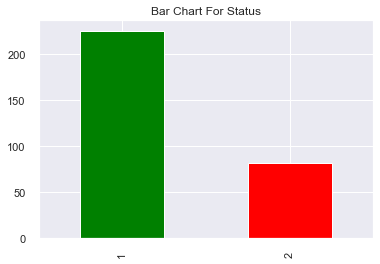

In [45]:
UCBHBCS_data.Status.value_counts().plot.bar(color =['green', 'red'])
plt.title('Bar Chart For Status')

From the above graph shows surival rates during the period 1958 - 1969. 1's (green) are Survived

<a id="section302"></a>
### 3.2 Pandas Pre Profiling before data processing 
[ToC](#toc)

In [27]:
profile = pandas_profiling.ProfileReport(UCBHBCS_data)
profile.to_file(output_file="UCBHBCS_before_preprocessing.html")
#profile.to_notebook_iframe()

Here, we have done pandas profiling before preprocessing of dataset as UCBHBCS_before_preprocessing.html.

#### Dataset Observation <br/>
Number of variables    : 4 <br/>
Number of observations :306 <br/>
Total Missing (%)      :0.0% <br/>
Total size in memory   :9.6 KB <br/>
 
#### Variables types <br/>
Numeric                :3 <br/> 
Boolean                :1 <br/>

- The age of the patients vary from 30 to 83 with the median of 52 & Standard deviation 10.8. 
- Maximum number of Pos_axillary_nodes observed is 52, nearly 75% of the patients have less than 5 Pos_axillary_nodes   and nearly 25% of the patients have no Pos_axillary_nodes.
- The data set contains only a small number of records (306).
- The Status column is imbalanced with 73% of values are ‘yes’
- Pos_axillary_nodes are having 44.4% zeros.
- Mean year of operation is 1963.
- Value in Status column are boolean & does not give any meaningful. 
  Hence they can be mapped as "yes"(survived) & "no"(not survived).

<a id="section4"></a>
## 4. Data Processing 
[ToC](#toc)

<a id="section401"></a>
### 4.1 Processing Survival Status Data to be visually meaningful
[ToC](#toc)

In [55]:
UCBHBCS_data['Status']= UCBHBCS_data['Status'].map({1:"Yes", 2:"No"})
print(UCBHBCS_data.head())
UCBHBCS_data.info()
print('*'*50)
print(UCBHBCS_data.iloc[:,-1].value_counts())

   Age  Years_of_operation  Pos_axillary_nodes Status
0   30                  64                   1    Yes
1   30                  62                   3    Yes
2   30                  65                   0    Yes
3   31                  59                   2    Yes
4   31                  65                   4    Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB
**************************************************
Yes    225
No      81
Name: Status, dtype: int64


<a id="section402"></a>
### 4.2 Pandas Pre Profiling after data processing 
[ToC](#toc)

In [57]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(UCBHBCS_data)
profile.to_file(output_file="UCBHBCS_after_preprocessing.html")

#### Post profiling Observation
- Status column is mapped to Categorical.
- The Status column is imbalanced with 73% of values are ‘yes’
- Out of total 306 patients, number of patients who survived over 5 years post operation are nearly 3 times the patients who died within 5 years.

<a id="section5"></a>
## 5.Exploratory Data Analysis
[ToC](#toc)

<a id="section501"></a>
### 5.1 No. of Patients Survived

Text(0.5, 1.0, 'Survival Status with respect to Age')

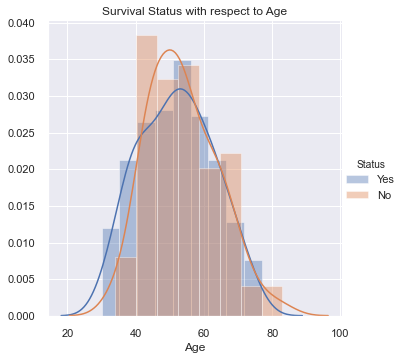

In [59]:
sns.FacetGrid(UCBHBCS_data, hue='Status', height=5) \
    .map(sns.distplot, 'Age') \
    .add_legend()
plt.title('Survival Status with respect to Age')

Text(0.5, 1.0, 'Plot for Pos_axillary_nodes')

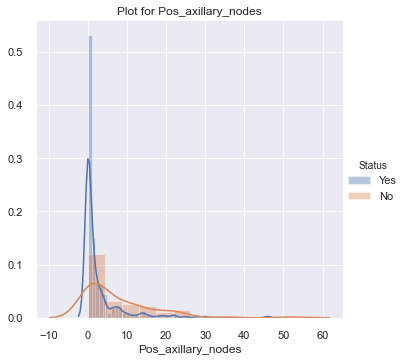

In [60]:
sns.FacetGrid(UCBHBCS_data, hue='Status', height=5) \
    .map(sns.distplot, 'Pos_axillary_nodes') \
    .add_legend()
plt.title('Plot for Pos_axillary_nodes')

Text(0.5, 1.0, 'Plot For Year_of_operation')

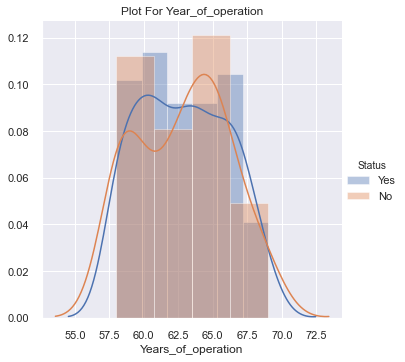

In [61]:
sns.FacetGrid(UCBHBCS_data, hue='Status', height=5) \
    .map(sns.distplot, 'Years_of_operation') \
    .add_legend()
plt.title('Plot For Year_of_operation')

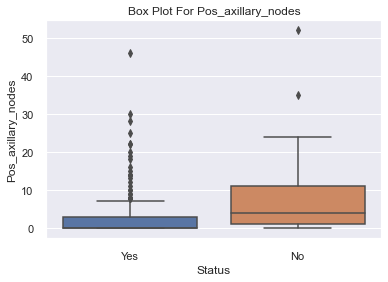

In [64]:
sns.boxplot(x='Status', y = 'Pos_axillary_nodes', data=UCBHBCS_data)
plt.title('Box Plot For Pos_axillary_nodes')
plt.show()

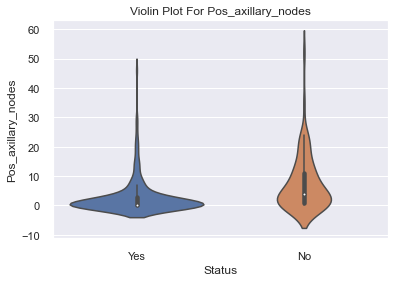

In [67]:
sns.violinplot(x='Status', y='Pos_axillary_nodes', data=UCBHBCS_data, size=5)
plt.title('Violin Plot For Pos_axillary_nodes')
plt.show()

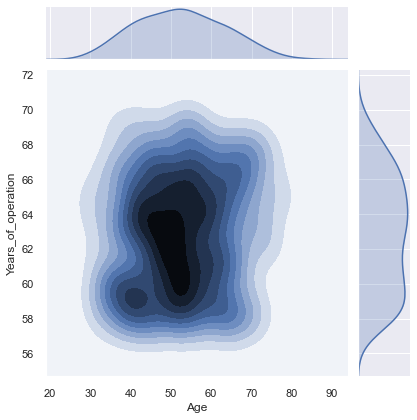

In [76]:
sns.jointplot(x ='Age', y ='Years_of_operation', data=UCBHBCS_data, kind='kde')
plt.show()

## Observation

1. Out of the 3 columns, Pos_axillary_nodes has the most significant distinct-distribution among the two Status.
2. For the patients who survived for more than 5yrs, the distribution for Pos_axillary_nodes seems to be more densed and centred at 0 whereas for those who lived less than 5yrs, the distrubtion is more varying and has larger values as well.
3. The number of patients that lived more than 5yrs were more during the period 1958 - 1963, whereas patients that lived less than 5 yrs were more during the period 1963 - 1967. Remaining time, both were rougly equal in number.
4. The age of the patient doesn't seem to have any say in whether he'll live beyond 5yrs or not.
5. The distribution of age_of_patients is roughly continuous.
6. From the above contour plot it can be observed that the years 1959–1964 witnessed more patients in age group of 45–55 years.

<a id="section502"></a>
### 5.2 Identifying best feature for the classification of the survival status using pair plot
[ToC](#toc)

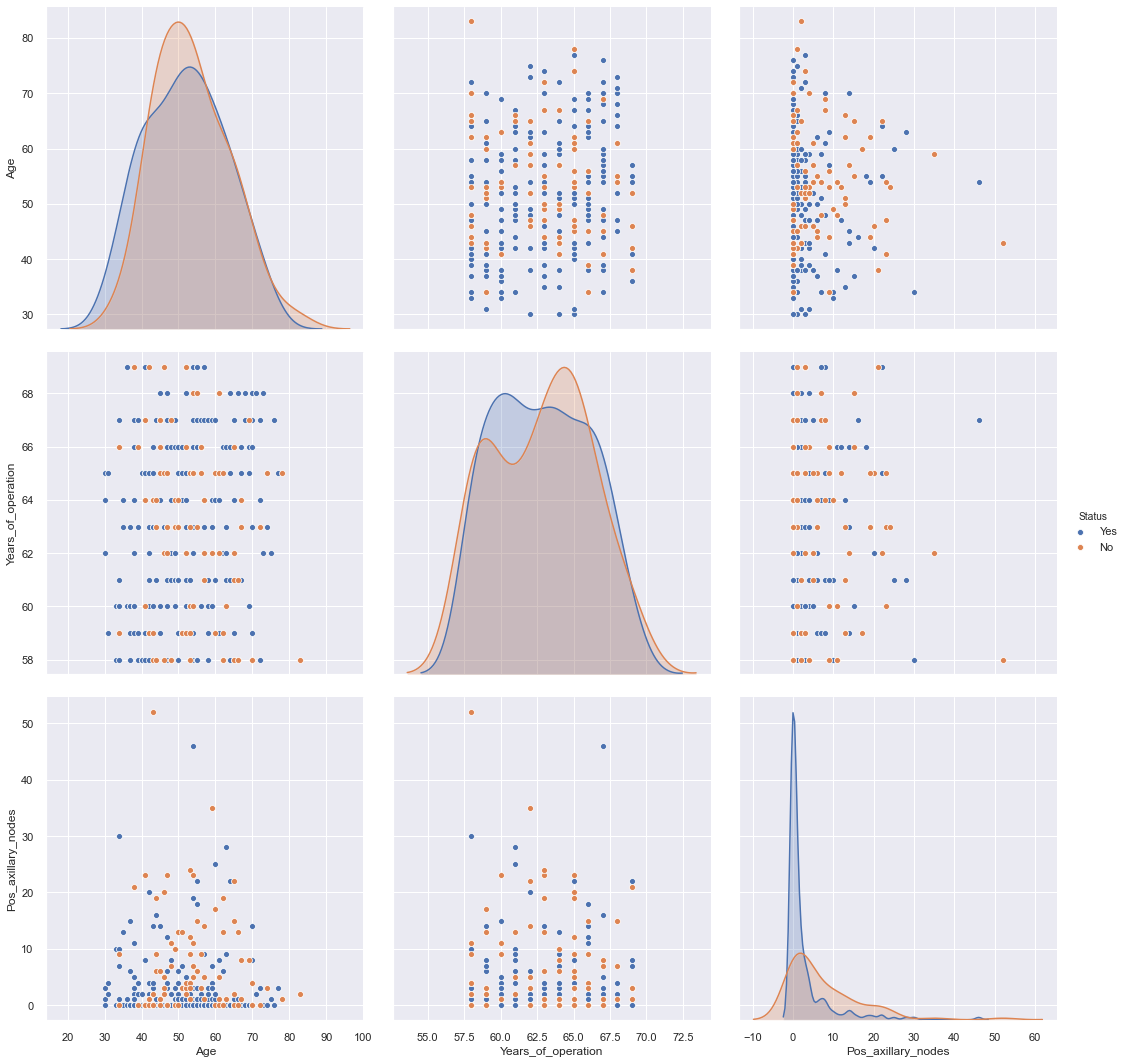

In [70]:
for idx, feature in enumerate(list(UCBHBCS_data.columns)[:1]):
  #  print(idx, feature)
    fg = sns.pairplot(UCBHBCS_data, hue='Status', height=5)
  #  fg.map(sns.distplot, feature).add_legend()
    plt.show()

- The number of Pos_axillary_nodes of the survivors is highly dense from 0 to 5 as observed.

- Almost 75% of the patients have less than or equal to 5 Pos_axillary_ nodes as we can see in the above plots.

- We get a better clarity of separating the two status (Yes & No) in the graph Pos_axillary_nodes v/s Years_of_operation.

<a id="section403"></a>

<a id="section6"></a>
## 6. Conclusion
[ToC](#toc)

- From this Dataset we can conclude that the majority of operations are performed on people age range between 35 and 65, where most of the points plotted on scatter plot (Operation_year vs Age)

- We can see that there is quite good concentration of data point when Pos_axillary_node is 0.

- We can conclude that maximum number of operation were done in span of 7 years between 1960 and 1966 (No_of_axillary_nodes vs Operation_year)

- Here with this scatter plot we get insight that patients with 0 axil nodes are more likely to survive irrespective to there age. (Axillary_node vs Age)

- It is very much less likely to have patients with Pos_axillary_ nodes more than 30.

- Patients who are older than 50 and have Pos_axillary_nodes greater than 10 are more likely to die.

- Most of the operations which were done in year 1960-65 were unsuccessfull as most the patients died within 5 years after opertaion.

- Patients having 0 Pos_axillary_nodes are more likely to survive.

- Patients within range of 45-65 and had Pos_axillary_node >= 1 are more likely to die.

- People less than age 40 are more likely to survive though having Pos_axillary_node greater than or equal to 1

- Box plot shows that, the more number of Pos_axillary_nodes, the more patients likely to die

- After taking a look at box plot we can see that, the large number of patients who survived had 0 Pos_axillary_nodes or doesn't had it at all.

- Patients and who died had Pos_axillary_nodes greater than or equal to 1, and as the count of Pos_axillary_nodes increases the respective patient is more likely to die.
<a id=section601></a>
### 6.1 Actionable Insights
- Pos_axillary_nodes is most important parameter in this dataset, and who had Pos_axillary_nodes >= 1 those are more likely to die.
- Age is also somewhat important feature of this dataset, because we have seen that patients who aged less than 40 are likely to survive inspite of having Pos_axillary_nodes >= 1
- There is no correlation between the patient’s age and number of positive axillary nodes detected.
- Patients having 4 or less positive axillary nodes have greater likelihood(~84%) of surviving 5 years or longer as compared to the patients having more than 4 positive axillary nodes.